In [1]:
import numpy as np
import matplotlib.pyplot as plt
import myML

In [45]:
def Test_1D(X):
    y = (X*6-2)**2*np.sin(X*12-4)
    return y

def Test_2D(X):
    y = (1-X[0,:])**2 + 100*(X[1,:]-X[0,:]**2)**2
    return y


In [93]:
# Training data
X_train = np.array([0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1], ndmin=2)
y_train = Test_1D(X_train)

# Testing data
X_test = np.linspace(0.0, 1, 100).reshape(1,-1)
y_test = Test_1D(X_test)

model = myML.GaussianProcess(kernel='gaussian')
model.fit(X_train, y_train)

[[99.55992413]]


In [92]:
y_pred, yvar_pred = model.predict(X_test)
X_test[0,np.argmax(yvar_pred)]

0.6353535353535352

Root Mean Squared Error:
48.71537379318968


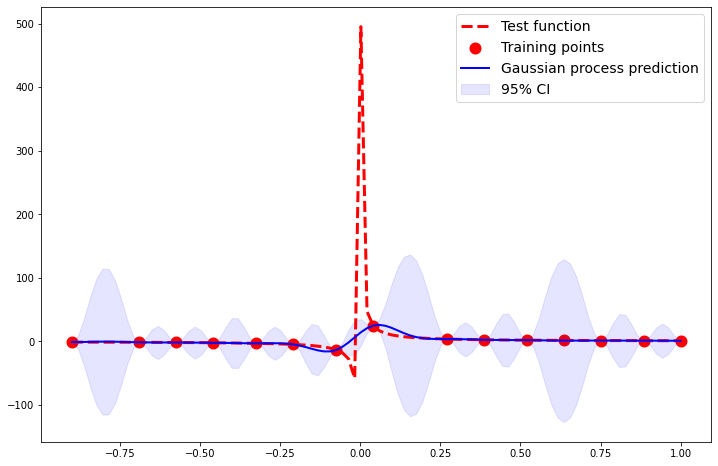

In [94]:
print('Root Mean Squared Error:')
print(model.score(X_test, y_test))

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

#Original function
ax.plot(X_test[0,:],y_test[0,:], linewidth=3, linestyle='--', color='red', label='Test function')
ax.scatter(X_train[0,:],y_train[0,:], linewidth=6, color='red', label='Training points')
#Prediction + confidence intervals
ax.plot(X_test[0,:],y_pred[0,:], linewidth=2, color='blue', label='Gaussian process prediction')
ax.fill_between(X_test[0,:],y_pred[0,:]-1.96*yvar_pred[0,:],y_pred[0,:]+1.96*yvar_pred[0,:], color='blue', alpha=0.1, label='95% CI')

#ax.set_xlim([-0.1, 1.1])
#ax.set_ylim([-7, 17])
ax.legend(loc='best', prop={'size': 14})
plt.show()

In [259]:
size = 100
a, b = np.meshgrid(np.linspace(-2,2,size),np.linspace(-1,3,size))

Z = np.zeros_like(a)
for i in range(size):
    for j in range(size):
        temp = np.array([a[i,j], b[i,j]]).reshape(-1,1) 
        Z[i,j] = Test_2D(temp)

X_test = np.array([a.flatten(), b.flatten()])
xnorm = myML.norm0to1(X_test)
y_test = Test_2D(X_test).reshape(1,-1)
ynorm = myML.norm0to1(y_test)

X_train = xnorm.recover(myML.staticSampling('LHSoptim', 2, 25))
y_train = Test_2D(X_train).reshape(1,-1)

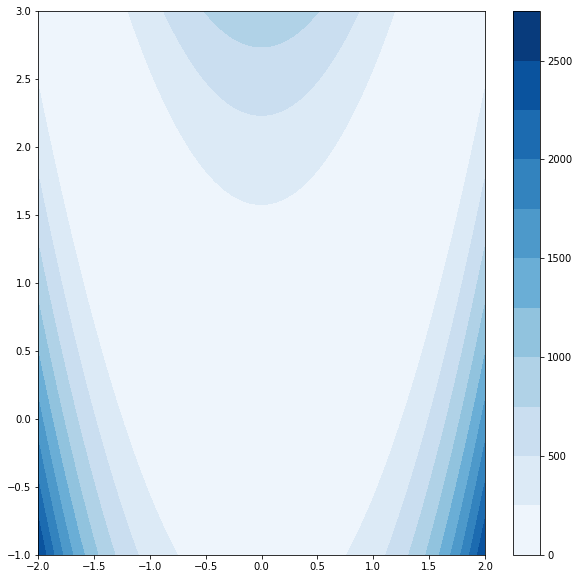

In [260]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.contourf(a, b, Z, 20, cmap='Blues')
img = ax.contourf(a, b, Z, 10, cmap='Blues')
plt.colorbar(img)

plt.show()

In [255]:
model = myML.GaussianProcess(kernel='gaussian')
model.fit(xnorm.normalize(X_train), ynorm.normalize(y_train))

[[4.51253185]]


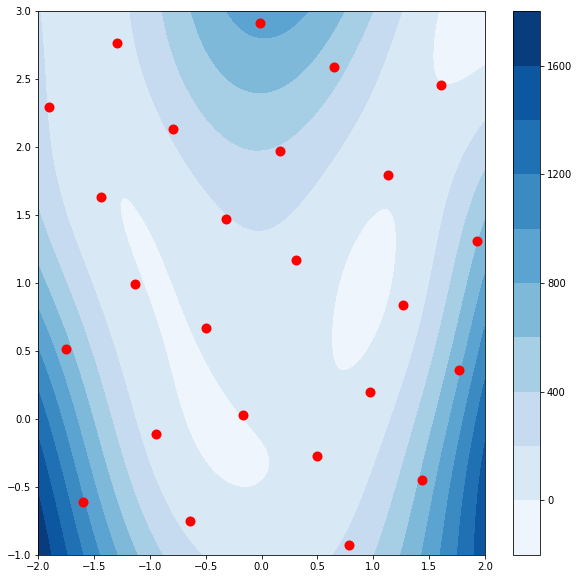

In [257]:
Z = np.zeros_like(a)
for i in range(size):
    for j in range(size):
        temp = np.array([a[i,j], b[i,j]]).reshape(-1,1)
        temp, _ = model.predict(xnorm.normalize(temp))
        Z[i,j] = ynorm.recover(temp)

fig = plt.figure(figsize=(10,10))
ax = plt.axes()


ax.contourf(a, b, Z, 20, cmap='Blues')
img = ax.contourf(a, b, Z, 10, cmap='Blues')
plt.colorbar(img)
ax.scatter(X_train[0,:],X_train[1,:], linewidth=4, color='red')
plt.show()